# Exam IV - Linear Regression
## Bootcamp for Data Science

**Prof. Dr. Juanjo Manjarín**

**14th March, 2021**

---


### <font color = "red"> Student Data </font>

Fill your NAME only:

#####  <font color = "mediumblue"> Student Name: </font>.....................................
#####  <font color = "mediumblue"> Grade:  </font> .....................................  

---

## <font color = "blue"> Instructions </font>

Read carefully these instructions and follow them during your exam and in your submission.

 * You have **2 weeks** to finish the exam
 * Once you have finished it you must upload it to the **campus online** in the assignment created with name **Exam II** (see below some instructions)
 * The files accepted for submission are:
    * Python notebook with extension `.ipynb`
    * The `html` version of the previous notebook (**recommended** since this guaranties that your codes can be executed)
    * A `.pdf`file with all the chunks of code executed
    * A `.py` file may be accpeted but then you have to copy all this document in it and answer the questions using Python comments
 * Read carefully the questions and do not answer before knowing what is asked
 * Full marks require **full explanations**. Just answering the question is not enough, for example, if one answer is that the type of data is *panel data*, saying only that will not grant you more than the 25% of the available points.
 * The **answers** must be written right below the questions made in this notebook (create any chunks as needed)
 * Each question is worth **one point*

About the student data and file name

 * You must fill the **student data** field `Name` only
 * The **name of the file** you submit to the campus online must be: `studentname_exam_II.ipynb`

---



# <font color = "Red"> Case Study </font>

In this case we are going to analyze part of the World Bank database concerning the **Environment** set of the **World Development Indicators**. In particular we are given a set of countries and several variables (see description in the tables below and visit the World Bank webpage to see a more detailed description). We want to understand if any of the variables contained in the dataset can be used to understand the **Life Expectancy**:

In [ ]:
# @hidden_cell
from IPython.display import HTML
HTML('<table style="margin-left:auto;margin-right:auto;"><caption style = "text-align: center;">Table 1.- Variables</caption><tr><th>Variable</th><th style="text-align: center;">Description</th><th style="text-align: center;">Licence URL</th></tr><tr><td>CO2Emissions</td><td>CO2 emissions (kt)</td><td>1</td></tr><tr><td>ForestArea</td><td>Forest area is land under natural or planted stands of trees of at least 5 meters in situ (% of land area)</td><td>1</td></tr><tr><td>UrbanPop</td><td>people living in urban areas (% Total Population)</td><td>1</td></tr><tr><td>AirPollution</td><td>Percent of population exposed to ambient concentrations of PM2.5 that exceed the WHO guideline value</td><td>1</td></tr><tr><td>LExpectancy</td><td>Life expectancy at birth</td><td>1</td></tr><tr><td>HFC</td><td>HFC gas emissions (thousand metric tons of CO2 equivalent)</td><td>1</td></tr><tr><td>BasicWater</td><td>The percentage of people using at least basic water services</td><td>1</td></tr><tr><td>GHEmissions</td><td>Total greenhouse gas emissions (kt of CO2 equivalent)</td><td>1</td></tr><tr><td>ElecPowCons</td><td> Consumption of energy coming from power plants and combined heat and power plants less transmission, distribution, and transformation losses and own use by heat and power plants</td><td>2</td></tr><tr><td>year</td><td>Year (2010 or 2016)</td><td></td></tr>tr><td>Continent</td><td>Continent</td><td></td></tr></table>')

where the licence for use and distribution of the data con be found in the following URLs:

 * Licence 1: CC By-4.0, https://datacatalog.worldbank.org/public-licenses#cc-by
 * Licence 2: IEA License, http://www.iea.org/t&c/termsandconditions

## <font color = "MediumBlue">Packages</font>

Insert in the cell code below all the packages and modules you will use in this exam

In [ ]:
# Base ------------------------------------------------------------------------------
import pandas as pd
import numpy as np
import scipy.stats as ss
from statsmodels.compat import lzip

# Viz -------------------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.rc('font', size = 12)
plt.rc('figure', titlesize = 20)
plt.rc('axes', labelsize = 12)
plt.rc('axes', titlesize = 15)

# Models ----------------------------------------------------------------------------
import statsmodels.stats as sts
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.stats.anova as aov
import statsmodels.stats.outliers_influence as sso
import statsmodels.stats.diagnostic as ssd
from statsmodels.formula.api import ols, wls
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.preprocessing import PowerTransformer
from scipy.stats import mstats

# Other -----------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [ ]:
from google.colab import drive
drive.mount('IEXL')

Mounted at IEXL


In [ ]:
!pip install scikit_posthocs

     |████████████████████████████████| 51kB 4.4MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for scikit-posthocs: filename=scikit_posthocs-0.6.7-cp37-none-any.whl size=37903 sha256=69d68d1d25e7898888f7dad248cbf9a489a19932a8e946665fae586c8cc5ca63
  Stored in directory: /root/.cache/pip/wheels/00/0f/56/897c22820a48a74f50f1a85faaa4b133bb8865e8b094b596f5
Successfully built scikit-posthocs


In [ ]:
import scikit_posthocs as sp

## <font color = "MediumBlue">Functions</font>

Use the following code cell below to define any functions you may need in the exam

In [ ]:
# @hidden_cell


## <font color = "MediumBlue">The Data</font>

In the Drive folder of the course you can find the dataset as an Excel file with name `LifeExpectancy.xlsx`. Load it into your environment using the code cell below. It is recommended that you inspect it before in order to identify how are the NaN values encoded. Be careful to only import the `Data` sheet.

After loading the dataset, use `head` to show the first elements of the data in order to check it has been properly imported.

In [ ]:
lexp = pd.read_excel('/content/IEXL/MyDrive/IEXL - Bootcamp Exams/Exam IV/LifeExpectancy.xlsx')
lexp.head()

,Country,Continent,ForestArea,CO2Emissions,UrbanPop,AirPollution,Lexpectancy,HFC,BasicWater,GHEmissions,ElecPowCons,Year
0,Albania,Europe,28.332116,4598.418,52.163,100.000000,76.562,105.0,87.811285,8506.996034,1943.343354,2010
1,Algeria,Africa,0.805294,119177.500,67.540,100.000000,74.938,275.0,92.389465,167674.633001,1016.636669,2010
2,Angola,Africa,46.907837,29057.308,59.783,100.000000,55.35,31.0,50.376841,40029.392101,206.454411,2010
3,Argentina,America,10.449119,187904.414,90.849,99.447641,75.278,506.0,98.468054,364684.253846,2877.652653,2010
4,Armenia,Europe,11.626273,4209.716,63.440,100.000000,73.331,565.0,98.266056,11393.039353,1726.259758,2010


Let's see the data types

In [ ]:
lexp.dtypes

Country          object
Continent        object
ForestArea      float64
CO2Emissions    float64
UrbanPop        float64
AirPollution    float64
Lexpectancy      object
HFC             float64
BasicWater      float64
GHEmissions     float64
ElecPowCons     float64
Year              int64
dtype: object

It looks like Lexpectancy is not treated as a numerical variable, then let's change its type. However, when we run the code `lexp['Lexpectancy'].astype('float64')`, we receive the error `could not convert string to float: 'electric'
`, which looks somewhat strange, but it points to a typo in the dataset. If we look for it, it turns out that the value for the life expectancy in Georgia in 2010 is written as `electric` and then we should either drop this value or go to WB dataset to find it. A fast search says that its value is 71.5 then let's apply this 

In [ ]:
lexp[lexp['Country'] == 'Georgia']

,Country,Continent,ForestArea,CO2Emissions,UrbanPop,AirPollution,Lexpectancy,HFC,BasicWater,GHEmissions,ElecPowCons,Year
42,Georgia,Europe,40.615915,6314.574,55.535,100.0,electric,20.0,95.736822,13108.623765,2049.544524,2010
173,Georgia,Europe,40.615915,10128.254,57.837,100.0,73.207,NaN,98.170550,NaN,NaN,2016


In [ ]:
lexp.at[42, 'Lexpectancy'] = 71.5
lexp[lexp['Country'] == 'Georgia']

,Country,Continent,ForestArea,CO2Emissions,UrbanPop,AirPollution,Lexpectancy,HFC,BasicWater,GHEmissions,ElecPowCons,Year
42,Georgia,Europe,40.615915,6314.574,55.535,100.0,71.5,20.0,95.736822,13108.623765,2049.544524,2010
173,Georgia,Europe,40.615915,10128.254,57.837,100.0,73.207,NaN,98.170550,NaN,NaN,2016


In [ ]:
lexp['Lexpectancy'] = lexp['Lexpectancy'].astype('float64')
lexp.dtypes

Country          object
Continent        object
ForestArea      float64
CO2Emissions    float64
UrbanPop        float64
AirPollution    float64
Lexpectancy     float64
HFC             float64
BasicWater      float64
GHEmissions     float64
ElecPowCons     float64
Year              int64
dtype: object

# <font color = "Red"> Questions</font>

For the model building below, and unless specified, use only the data from year 2010.

## 1.- <font color = "MediumBlue"> Multicollinearity </font>

**Before building our model, let's check if there may be problems with collinearity between some of the variables in order to decide which of them we should or should not include in our model. Then considering our dependent variable as `LExpectancy`, then**

 * **Find the Correlation matrix**
 * **Find the VIFs of the different variables**
 * **Make a pairsplot (optional, but here use the continent as the hue color)**
 
**Explain which method you chose and why. Then with this information explain if you can use all the variables for the models or you may drop any of them.**

Let's first find the correlation matrix

In [ ]:
corr_df = lexp[lexp['Year']==2010].drop(['Country', 'Continent', 'Year', 'Lexpectancy'], axis=1).corr()
corr_df.style.background_gradient(cmap='coolwarm', axis=1).set_precision(4)

,ForestArea,CO2Emissions,UrbanPop,AirPollution,HFC,BasicWater,GHEmissions,ElecPowCons
ForestArea,1.0000,-0.0027,-0.0067,-0.2062,0.0350,-0.0736,0.0371,-0.0662
CO2Emissions,-0.0027,1.0000,0.0296,-0.0743,0.8735,0.0842,0.9803,0.0711
UrbanPop,-0.0067,0.0296,1.0000,-0.2835,0.0818,0.6313,0.0094,0.5326
AirPollution,-0.2062,-0.0743,-0.2835,1.0000,-0.1692,-0.2361,-0.0653,-0.5927
HFC,0.0350,0.8735,0.0818,-0.1692,1.0000,0.0902,0.8427,0.1315
BasicWater,-0.0736,0.0842,0.6313,-0.2361,0.0902,1.0000,0.0430,0.4056
GHEmissions,0.0371,0.9803,0.0094,-0.0653,0.8427,0.0430,1.0000,0.0433
ElecPowCons,-0.0662,0.0711,0.5326,-0.5927,0.1315,0.4056,0.0433,1.0000


now we can fidn the variance inflation factors as

In [ ]:
X = lexp.drop(['Country', 'Continent', 'Year', 'Lexpectancy'], axis=1)
X['Intercept'] = 1

vif = pd.DataFrame()
vif['variables'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.dropna().values, i)for i in range(X.shape[1])]

print(vif)

      variables        VIF
0    ForestArea   1.151894
1  CO2Emissions  36.871465
2      UrbanPop   2.056866
3  AirPollution   1.748453
4           HFC   4.725180
5    BasicWater   1.775019
6   GHEmissions  29.381345
7   ElecPowCons   2.131199
8     Intercept  79.030973


in both cases we see that we may drop either the CO2 emissions or the GH emissions since both are highly correlated (basically because the GH emissions are mainly driven by CO2), then we will drop `GHEmissions` from the model

## 2.- <font color = "MediumBlue"> Modelization </font>

**Without using the categorical variable of the continent, find the best possible linear model that may let you explain the variability of the life expectancy as a function of the other variables. Write the model in the following cell code, then answer the questions below**


For this model we are going to use a deletion approach to NAs since we don't see any problem with the data itself that may force us to not having it, therefore we assume that the NAs are random

In [ ]:
lexp_2010 = lexp[lexp['Year'] == 2010].dropna()
lexp_2010.head()

,Country,Continent,ForestArea,CO2Emissions,UrbanPop,AirPollution,Lexpectancy,HFC,BasicWater,GHEmissions,ElecPowCons,Year
0,Albania,Europe,28.332116,4598.418,52.163,100.000000,76.562,105.0,87.811285,8506.996034,1943.343354,2010
1,Algeria,Africa,0.805294,119177.500,67.540,100.000000,74.938,275.0,92.389465,167674.633001,1016.636669,2010
2,Angola,Africa,46.907837,29057.308,59.783,100.000000,55.350,31.0,50.376841,40029.392101,206.454411,2010
3,Argentina,America,10.449119,187904.414,90.849,99.447641,75.278,506.0,98.468054,364684.253846,2877.652653,2010
4,Armenia,Europe,11.626273,4209.716,63.440,100.000000,73.331,565.0,98.266056,11393.039353,1726.259758,2010


Then we are left with 122 observations and 12 variables (for year 2010)

In [ ]:
lexp_2010.shape

(122, 12)

Then the final model we obtain is the following

In [ ]:
model = ols('Lexpectancy ~ BasicWater + ElecPowCons', data = lexp_2010).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Lexpectancy   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     159.3
Date:                Sun, 20 Jun 2021   Prob (F-statistic):           2.23e-34
Time:                        16:28:49   Log-Likelihood:                -342.75
No. Observations:                 122   AIC:                             691.5
Df Residuals:                     119   BIC:                             699.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      37.4085      2.281     16.401      

### 2.1  <font color = "Blue"> Model Selection </font>

**How did you choose between different models? (Give a qualitative explanation)** 


The first step has been a selection on variables based on the correlation and VIF (as can be seen in the multicollinearity section). The second part, maybe a bit more subtle has been a **stepwise backwards selection**, where we have gone removing variables based on AIC criteria (an alternative not so recommended but which can work is remove variables based on the individial p-values, but this is a risky procedure).

At each step we have fit all the possible models coming from removing one of the variables and kept the one with the smallest AIC until no improvement is made.

Later we will check if the Gauss-Markov conditions are satisfied and the model is validated.

### 2.2 <font color = "Blue"> Explanatory Power </font>

**Interpret the explanatory power of your model using the values of RSE and $\bar R^2$**


In [ ]:
# Data ---------------------------
residuals = model.resid
n = model.nobs
K = len(model.model.exog[0])-1

# Variance of the Errors ---------
RSS = sum(residuals**2)

# Explanatory Power --------------
RSE = np.sqrt(RSS/(n-K-1))
r2 = model.rsquared_adj

print(f'The adjusted R2 is {r2:4.4f}')
print(f'The Residuals Standard Error is {RSE:4.4f}')

The adjusted R2 is 0.7235
The Residuals Standard Error is 4.0671


These values imply that we can explain the $72.34\%$ of the life expectancy with this model and that even if the model were the true one, on average, we would still be 4.07 years away from the true value due to the random noise in the variable.

Both values are reasonably good, although point to the existence of other relevant variables that may help us to improve the model.

### 2.3 <font color = "Blue"> Model Assumptions </font>

**Does the model satisfy the assumptions of the MLRM? (linearity, normality of the residuals and homoskedasticity)?**

#### Linearity

The H0 of the test is that the model is properly specified (no need of extra variables)

$$
H_0:\{\text{The model is linear}\}
$$

We are going to use Harvey-Collier test which tests on the mean 

In [ ]:
name = ['t value', 'p value']
test = sms.linear_harvey_collier(model)
lzip(name, test)

[('t value', -0.16670436928422638), ('p value', 0.8678879931109317)]

the p-value implies that there are no problems with misspecification of the model. Let's make a residuals plot to see if this agrees with the intution from it

In [ ]:
# Fitted and abs-residuals ------------------------------
fitted = model.fittedvalues
abs_resids = np.abs(residuals)

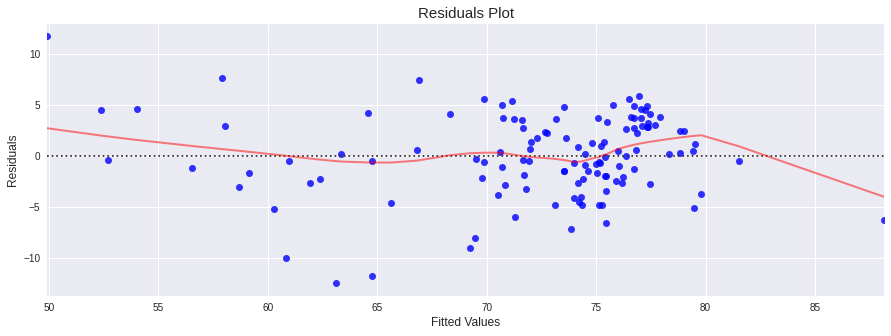

In [ ]:
plt.figure(figsize = (15,5))
sns.residplot(x = fitted, y = 'Lexpectancy', data = lexp_2010,
              lowess = True,
              scatter_kws = {'color': 'blue'},
              line_kws = {'color': 'red', 'lw': 2, 'alpha': 0.5})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

note that a Ramsey Test may reject the NULL due to the absence of values in the bottom left region of the graph which may be indicative of a quadratic shape, and to the bottom right value which is shifting the lowess towards it. However, these deviations don't seem too relevant. As an alternative we may use Rainbow test as

In [ ]:
name = ['t value', 'p value']
test = sms.linear_rainbow(model, frac=0.5)
lzip(name, test)

[('t value', 1.1480936142143687), ('p value', 0.29891158055387246)]

which again fails to reject linearity.

#### Normality

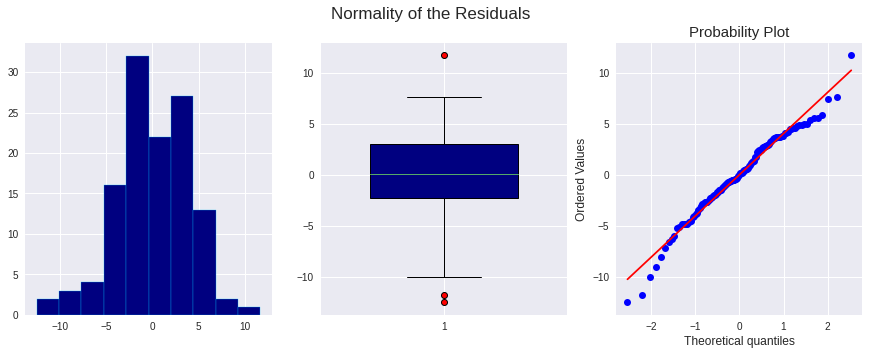

In [ ]:
plt.figure(figsize=(15,5))
plt.suptitle('Normality of the Residuals', fontsize=17)

plt.subplot(1,3,1)
plt.hist(residuals,
         color='navy',
         ec='deepskyblue')

plt.subplot(1,3,2)
plt.boxplot(residuals,
            patch_artist=True,
            widths=0.6,
            flierprops = dict(marker='o',
                              markerfacecolor='red'),
            boxprops = dict(facecolor='navy'))

plt.subplot(1,3,3)
ss.probplot(residuals, plot=plt)
plt.show()

From the graphs we may see that there may be a problem in the tails of the dsitribution (just as we have seen in the linearity case). In this case we are going to perform different normality tests

In [ ]:
s_stat, s_pval = ss.shapiro(residuals)
d_stat, d_pval = ss.normaltest(residuals)

print(f'Shapiro-Wilk statistic: {s_stat:4.2f}\np-value: {s_pval:4.4f}')
print(f'\nD\'Agostino statistic: {s_stat:4.2f}\np-value: {d_pval:4.4f}')

Shapiro-Wilk statistic: 0.98
p-value: 0.0687

D'Agostino statistic: 0.98
p-value: 0.0498


From these tests we see that normality can only be assumed for a 1% since all the three tests (including Jarque-Bera from the summary) return p-values in the order of 5%.

#### Heteroskedasticy

From the residuals plot before we may infer that in this case we can find some problems since there is a funnel-like shape in it (from right to left) then we are going to perform different tests: Breusch-Pagan, White and Goldfeld-Quandt:

In [ ]:
values = ['Multiplier', 'p-value', 'F statistic', 'Fp-value']
bp_test = ssd.het_white(residuals, model.model.exog)
lzip(values, bp_test)

[('Multiplier', 16.360947474439826),
 ('p-value', 0.005885662590996563),
 ('F statistic', 3.5931217890766582),
 ('Fp-value', 0.004662862311791568)]

In [ ]:
values = ['Multiplier', 'p-value', 'F statistic', 'Fp-value']
bp_test = ssd.het_breuschpagan(residuals, model.model.exog)
lzip(values, bp_test)

[('Multiplier', 15.953347974025716),
 ('p-value', 0.00034337961036774196),
 ('F statistic', 8.9510058669465),
 ('Fp-value', 0.0002391439054417436)]

In [ ]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, model.model.exog)
lzip(name, test)

[('F statistic', 0.9002280259177067), ('p-value', 0.6548410231882309)]

In all but GQ tests, we reject homoskedasticity. Let's plot the residuals against the independent variables to see if we can detect where the problem comes from, then

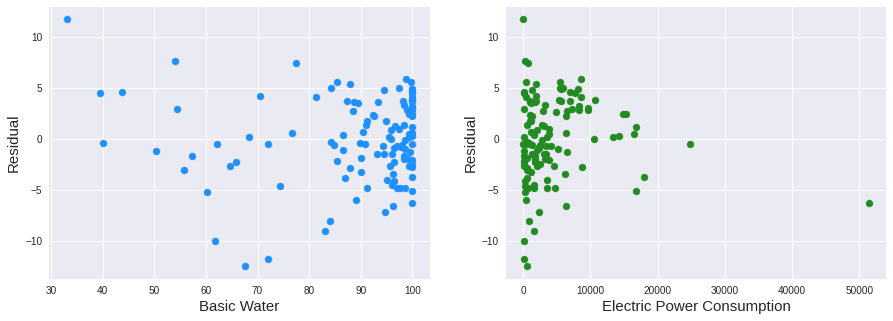

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(y=residuals, x=lexp_2010['BasicWater'],
            color='dodgerblue')
plt.ylabel('Residual', fontsize=15)
plt.xlabel('Basic Water', fontsize=15)

plt.subplot(1,2,2)
plt.scatter(y=residuals, x=lexp_2010['ElecPowCons'],
            color='forestgreen')
plt.ylabel('Residual', fontsize=15)
plt.xlabel('Electric Power Consumption', fontsize=15)

plt.show()

From these graphs we see that the problem may come from both variables, if we follow Glesjer test and regress the residuals on the variables, it turns that the problem comes from the `Basic Water` variable (only this variable is relevant)

In [ ]:
aux_data=pd.DataFrame({'resid': np.abs(residuals), 'epc': lexp_2010['ElecPowCons'], 'water': lexp_2010['BasicWater']})
aux_model = ols('resid ~ water', data=aux_data).fit()
print(aux_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  resid   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     9.597
Date:                Sun, 20 Jun 2021   Prob (F-statistic):            0.00243
Time:                        16:30:22   Log-Likelihood:                -279.75
No. Observations:                 122   AIC:                             563.5
Df Residuals:                     120   BIC:                             569.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.1044      1.295      5.487      0.0

Then we may perform a *weighted least squares* using this information and use the fitted values of this last model to define the weights of the model. To decide between different alternatives of these weights wnote that what we detect is a funnel shape in the plots of the residuals vs. fitted value and the regressor. Then we have two options, estimate the weights from the regression of the absolute value of the residuals on the 

 * the fitted values
 * the regressor

this last is the previous model we have found, then the other is 

In [ ]:
aux_data_2=pd.DataFrame({'resid': np.abs(residuals), 'fitted': model.fittedvalues})
aux_model_2 = ols('resid ~ fitted', data=aux_data_2).fit()
print(aux_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  resid   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     7.862
Date:                Sun, 20 Jun 2021   Prob (F-statistic):            0.00589
Time:                        16:31:03   Log-Likelihood:                -280.57
No. Observations:                 122   AIC:                             565.1
Df Residuals:                     120   BIC:                             570.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.9353      2.430      4.089      0.0

this second model does not produce a significant coefficient and will not be used. Then we will estimate the weights from the fitted values of the `aux_model`

In [ ]:
y=lexp_2010['Lexpectancy']
x=lexp_2010[['BasicWater','ElecPowCons']]
x = sm.add_constant(x)    

weights = abs(aux_model.fittedvalues)**(-2)

we_model = sm.WLS(y, x, weights).fit()
print(we_model.summary())

                            WLS Regression Results                            
Dep. Variable:            Lexpectancy   R-squared:                       0.675
Model:                            WLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     123.8
Date:                Sun, 20 Jun 2021   Prob (F-statistic):           8.49e-30
Time:                        17:58:46   Log-Likelihood:                -334.83
No. Observations:                 122   AIC:                             675.7
Df Residuals:                     119   BIC:                             684.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          34.0941      3.016     11.304      

Note that this is the model we will use from now on.

#### Autocorrelation

In this case looking at the tables we find that for $n\approx 100$ and $k=2$ we have $d_L=1.502$ and $d_U=1.582$. In our case $DW=1.842$, which implies that there is no autocorrelation.

You may want to use any other of the schemes to detect autocorrelation. One possible is the Breusch-Godfrey, which in our case makes use of a regression

$$
\hat e_i=\beta_0+\beta_1\,\text{BasicWater}+\beta_2\,\text{ElecPowCons} + \sum_{j=1}^p \hat e_{i-j}
$$

where $\hat e_{i-j} \in \{\hat e_{i-1}, \hat e_{i-2}, \hat e_{i-3},\dots\}$  are all the possible lags of the residuals. In this case 

$$
(n-p)R^2\rightarrow\chi^2_p
$$

We are just going to use the first lag, then we have a $\chi^2_1$ distribution from the value of the $R^2$ of the model. 


In [ ]:
ssd.acorr_breusch_godfrey(we_model,1)

(2.1386158032265516,
 0.1436314381218471,
 0.00028840015399915465,
 0.986479378678417)

the p-values are the second and fourth values returned by the function, then with both we fail to reject no autocorrelation in the model.

### 2.4 <font color = "Blue"> Coefficients </font>

**Give an interpretation of the coefficients of the model. Is the impact of each coefficient in agreement with your expectations? Is there any statistically relevant variable which is practically irrelevant?**

The fact that among the different variables some of them are irrelevant as the air pollution may seem at the beginning a bit surprising, but if we see it, it just turns out that that variable implies a bad situation for all the countries, being a percentage it does not give too much information, anyway.

On the other hand, the coefficients of the model imply that:

 * When no percentage of the population has access to basic water facilities and there is no consumption of energy from electrical stations, the life expectancy would be, on average, $34.09$ years.
 * Holding the consumption from electrical stations fixed, an increase of 1 unit in the percentage of population with access to basic water facilities increases the life expectancy on $0.42$ years, on average.
 * Holding the percentage of the population with access of water facilities fixed, an increase of one unit in the consumption of electrical power, increases the life expectancy in $0.0002$ years, on average
 
The second coefficient is practically irrelevant, although statistically significant, since the magnitude change produced is tiny. Even considering that the variable takes values in a large range, the change needed to produce a significant impact would be too large.

### 2.5 <font color = "Blue"> Confounding Variables </font> 

**Given the value you obtained of $\bar R^2$, do you think there may be other relevant variables not included in the model? If so, what is the possible impact of not having included them? Can you name three of them and say why do you think they are relevant and their possible impact?**

The $\bar R^2=0.67$ which implies that we can explain the $67\%$ of the variability in the life expectancy using just these two variables. There are may other variables we may want to consider:

 * Unemployment rate
 * Economic wellbeing: income,...
 * Health investments and behaviours
 * Demographical structure 

to mention just some of them. In general it is assumed that the socioeconomical status, the demographics and the health care are the three main pilars that affect the life expectancy.

## 3. <font color = "MediumBlue">Categorical Variable</font>


### 3.1.-  <font color = "Blue"> Comparison of Years </font> 

**Our next analysis will deal with the variation of the life expectancy in two years: 2010 and 2016. For this, fir the following model**

$$
\text{LExpectancy} = \beta_0 + \beta_1\,\text{year}
$$

**which corresponds to the comparison of two populations means. Given the model (and remember that in this case the variable *must* be normally distributed (so transform it if needed) would you say that there is a significant difference in the life expectancy in the world in these two years for a 1%? And for a 5%?**

Let's first see the normality of the life expectancy

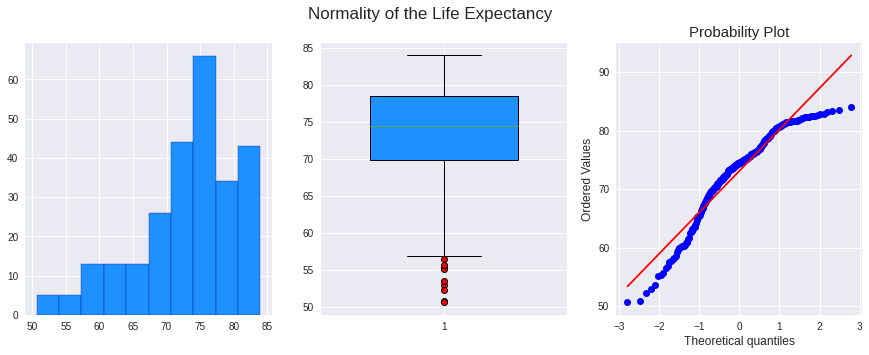

In [ ]:
plt.figure(figsize=(15,5))
plt.suptitle('Normality of the Life Expectancy', fontsize=17)

plt.subplot(1,3,1)
plt.hist(lexp['Lexpectancy'],
         color='dodgerblue',
         ec='navy')

plt.subplot(1,3,2)
plt.boxplot(lexp['Lexpectancy'],
            patch_artist=True,
            widths=0.6,
            flierprops = dict(marker='o',
                              markerfacecolor='red'),
            boxprops = dict(facecolor='dodgerblue'))

plt.subplot(1,3,3)
ss.probplot(lexp['Lexpectancy'], plot=plt)
plt.show()

From the graphs we immdiately see that the distribution is left-skewed, which can be tested easily

In [ ]:
ss.normaltest(lexp['Lexpectancy'])

NormaltestResult(statistic=31.178185602859173, pvalue=1.697239061817585e-07)

then we need to make a transformation to obtain a normally distributed variable. Since all the values are positive, we can perform a Box-Cox transformation, then the power of the transformation is

In [ ]:
transformed, power = ss.boxcox(lexp['Lexpectancy'])
power

4.672902883871155

we may prefer to use Jeo-Johnson, and then we obtain

In [ ]:
# Transformation
var = lexp['Lexpectancy'].astype('float64').to_numpy().reshape((len(lexp['Lexpectancy']),1))
power = PowerTransformer()
var_transf = power.fit_transform(var)
pow = power.fit(var)
pow.lambdas_[0]

4.728049412137205

In any case, we obtain a very similar transformation 

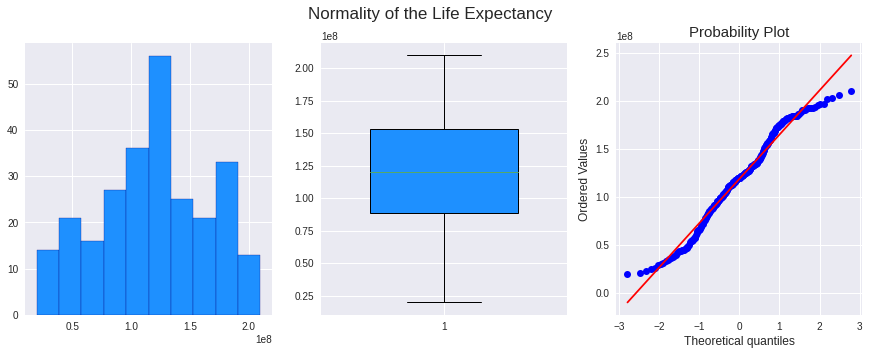

In [ ]:
plt.figure(figsize=(15,5))
plt.suptitle('Normality of the Life Expectancy', fontsize=17)

plt.subplot(1,3,1)
plt.hist(transformed,
         color='dodgerblue',
         ec='navy')

plt.subplot(1,3,2)
plt.boxplot(transformed,
            patch_artist=True,
            widths=0.6,
            flierprops = dict(marker='o',
                              markerfacecolor='red'),
            boxprops = dict(facecolor='dodgerblue'))

plt.subplot(1,3,3)
ss.probplot(transformed, plot=plt)
plt.show()

That gives problems in the tails of the distribution: since there is a natural cutoff in both sides, we have a truncated distribution that will fail to be normal but symmetdue to the lack of values in the tails. However, since the sample size is larger than 40, we can use the normal approximation by the CLT, then

In [ ]:
lexp['L_trans'] = transformed
years = ols('L_trans ~ C(Year)', data=lexp).fit()
print(years.summary())

                            OLS Regression Results                            
Dep. Variable:                L_trans   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     3.712
Date:                Sun, 20 Jun 2021   Prob (F-statistic):             0.0551
Time:                        17:00:39   Log-Likelihood:                -4993.8
No. Observations:                 262   AIC:                             9992.
Df Residuals:                     260   BIC:                             9999.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.131e+08   4.02e+06     

we see that the model is

$$
\text{Lexpectancy} = 1.12\cdot 10^8 + 1.10\cdot 10^7\,\text{Year}_{2016}
$$

where we have made the explicit subindex denoting that the base year is 2010. Then we find a p-value for the variable (and the model) of $0.049$, then

 * For a 1% we fail to reject the NULL and do not find evidence that the model is relevant, then we do not detect any significant difference between the life expectancy in both years
 * For a 5% we may reject the NULL and detect a significant difference, however, the p-value is so close to $\alpha$ that we may better conclude that the test is not conclusive (we need a different significance level, as 10%, for exmaple)


### 3.2.- <font color = "Blue"> ANOVA </font>  

**Let's now see if there is a significant difference in the life expectancy across different continents. For this we will use the following model:**

$$
\text{LExpectancy} = \beta_0 + \beta_1\,\text{continent}
$$

**Then discuss for a 1% of significance level:**

 * **If this model let’s you explain the variability of the life expectancy around the world, then**
 * **If the model is relevant, perform a post-hoc analysis and determine whcih continents are different and in which the life expectancy is larger**



In this analysis we will use the transformed variable

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


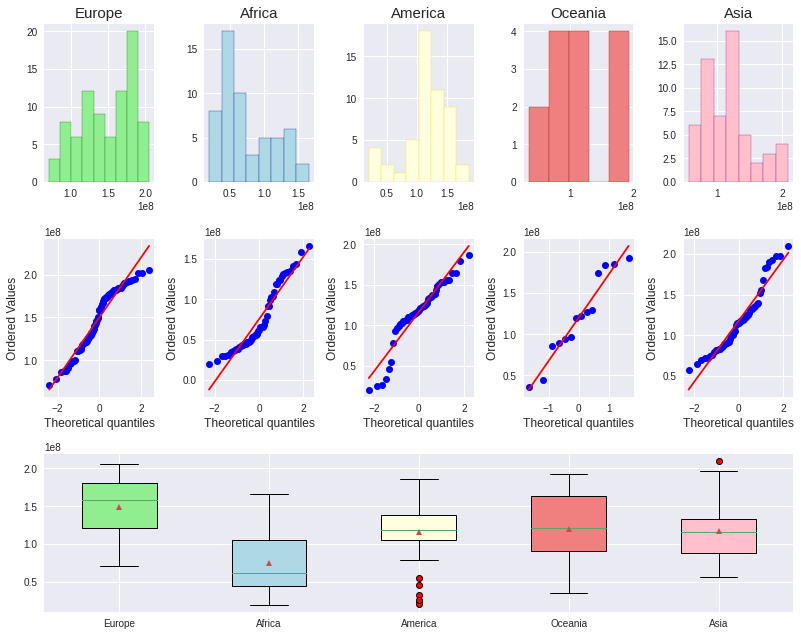

In [ ]:
colors = ['lightgreen', 'lightblue', 'lightyellow', 'lightcoral', 'pink']
borders = ['Darkgreen', 'Darkblue', 'gold', 'Darkred', 'purple']
continents = lexp.Continent.unique()
coords_h = [(0,0), (0,1), (0,2), (0,3), (0,4)]
coords_v = [(1,0), (1,1), (1,2), (1,3), (1,4)]

plt.figure(figsize = (15,10))

for i,j,k,l,m in zip(colors, borders, continents, coords_h, coords_v):
  plt.subplot2grid((3,6), l)
  plt.hist(lexp[lexp['Continent'] == k]['L_trans'],
           color = i,
           ec = j,
           bins = 'rice')
  plt.title(k.title())

  plt.subplot2grid((3,6), m)
  ss.probplot(lexp[lexp['Continent'] == k]['L_trans'],
            dist = 'norm',
            plot = plt)
  plt.title('')


# Boxplots ------------------------------------------
plt.subplot2grid((3,6), (2,0), colspan=5)
bp =plt.boxplot([lexp[lexp['Continent']=='Europe']['L_trans'],
                 lexp[lexp['Continent']=='Africa']['L_trans'],
                 lexp[lexp['Continent']=='America']['L_trans'],
                 lexp[lexp['Continent']=='Oceania']['L_trans'],
                 lexp[lexp['Continent']=='Asia']['L_trans']],
                showmeans = True,
                patch_artist = True,
                widths = 0.5,
                flierprops = dict(marker = 'o',
                                  markerfacecolor = 'red'),
                labels = ['Europe', 'Africa', 'America', 'Oceania', 'Asia']
                )

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

plt.tight_layout(rect = (0,0,0.9,0.9))
plt.show()

from this graph we see that we are not going to satisfy the ANOVA conditions, neither normality nor homoskedasticity hold (you may check it formally). However (more or less) all of them deviate in the same direction (see the QQ-plots) and we may be directed to use Kruskal-Wallis, then

In [ ]:
print("Kruskal Wallis H-test test:\n")

H, pval = mstats.kruskalwallis(lexp[lexp['Continent']=='Europe']['L_trans'].values,
                               lexp[lexp['Continent']=='Africa']['L_trans'].values,
                               lexp[lexp['Continent']=='America']['L_trans'].values,
                               lexp[lexp['Continent']=='Oceania']['L_trans'].values,
                               lexp[lexp['Continent']=='Asia']['L_trans'].values)

print("H-statistic:", H)
print("P-Value:", pval)

if pval < 0.05:
    print("\nReject the NULL hypothesis for a 5%: There is evidence in favor of significant differences between the populations.")
if pval > 0.05:
    print("\nFail to Reject the NULL hypothesis for a 5%: There is no evidence in favor of significant differences between the populations")

Kruskal Wallis H-test test:

H-statistic: 78.60319259779284
P-Value: 3.4423565056494884e-16

Reject the NULL hypothesis for a 5%: There is evidence in favor of significant differences between the populations.


since we reject the NULL, we can use a post-hoc analysis to determine which of the populations is significantly different.

In [ ]:
sp.posthoc_conover(lexp, val_col='L_trans', group_col='Continent', p_adjust = 'holm')

,Africa,America,Asia,Europe,Oceania
Africa,1.000000e+00,0.000004,0.000011,1.307782e-20,0.002890
America,4.481099e-06,1.000000,1.000000,3.805113e-05,1.000000
Asia,1.093757e-05,1.000000,1.000000,5.626141e-06,1.000000
Europe,1.307782e-20,0.000038,0.000006,1.000000e+00,0.034014
Oceania,2.889753e-03,1.000000,1.000000,3.401420e-02,1.000000


From this table we see that we fail to reject the equality of Oceania with America and Asia and also of Asia with America. All the other comparisons reject the equality and we find evidence against the equality of the life expectancies in those continents.

### 3.3.- <font color = "Blue"> Categorical Variable </font>  

**If any of the previous variables is relevant to explain the variability of the life expectancy, try to use it in the model of section 2. Then**

#### 3.3.1. Chow Test

**Perform a Chow test with the variable must be introduced in the model and how**


Given that the continent is a relevant variable we are going to include it in the model. However, in this case we have the problem that with the continent variable we may be adding 4 categorical variables and be comparing against the base continent which will be Africa in this case.

The previous analysis implies that both Europe and Africa are different to all the other continents and the other three are not different, then we are going to define the dummies for these two variables

In [ ]:
new_data = pd.concat((lexp,
                      pd.get_dummies(lexp['Continent'])),
                     axis=1).drop('Continent', axis=1)
new_data.head()

,Country,ForestArea,CO2Emissions,UrbanPop,AirPollution,Lexpectancy,HFC,BasicWater,GHEmissions,ElecPowCons,Year,L_trans,Africa,America,Asia,Europe,Oceania
0,Albania,28.332116,4598.418,52.163,100.000000,76.562,105.0,87.811285,8506.996034,1943.343354,2010,1.362148e+08,0,0,0,1,0
1,Algeria,0.805294,119177.500,67.540,100.000000,74.938,275.0,92.389465,167674.633001,1016.636669,2010,1.232293e+08,1,0,0,0,0
2,Angola,46.907837,29057.308,59.783,100.000000,55.350,31.0,50.376841,40029.392101,206.454411,2010,2.991112e+07,1,0,0,0,0
3,Argentina,10.449119,187904.414,90.849,99.447641,75.278,506.0,98.468054,364684.253846,2877.652653,2010,1.258638e+08,0,1,0,0,0
4,Armenia,11.626273,4209.716,63.440,100.000000,73.331,565.0,98.266056,11393.039353,1726.259758,2010,1.113579e+08,0,0,0,1,0


Now we are going to add the variables separatedly, which means that we are going to perform two different Chow tests

In [ ]:
# Models
pooled =  wls('Lexpectancy ~ BasicWater + ElecPowCons', data = new_data).fit()
model_0 = wls('Lexpectancy ~ BasicWater + ElecPowCons', data = new_data[new_data['Africa'] == 0]).fit()
model_1 = wls('Lexpectancy ~ BasicWater + ElecPowCons', data = new_data[new_data['Africa'] == 1]).fit()

# T and K
T = pooled.nobs
K = len(pooled.model.exog[0]) - 1

# Sum of square residuals
SSRp = sum(pooled.resid**2)
SSR0 = sum(model_0.resid**2)
SSR1 = sum(model_1.resid**2)

# F-statistic
Fstat_1 = ((SSRp - (SSR0 + SSR1))/(SSR0 + SSR1))*((T - 2*(K+1))/(K+1))
Fstat_2 = ((SSRp - (SSR0 + SSR1))/(SSR0 + SSR1))*((T - 2*(K+1))/(K))

# p-values
Fpval_1 = 1 - ss.f.cdf(Fstat_1, K+1, n-2*(K+1))
Fpval_2 = 1 - ss.f.cdf(Fstat_2, K, n-2*(K+1))

Fpval_1, Fpval_2

(0.0007620159247209157, 0.00022828914789341237)

we reject both tests and then all the terms, intercept and interaction are needed for this variable, and for Europe

In [ ]:
# Models
pooled =  wls('Lexpectancy ~ BasicWater + ElecPowCons', data = new_data).fit()
model_0 = wls('Lexpectancy ~ BasicWater + ElecPowCons', data = new_data[new_data['Europe'] == 0]).fit()
model_1 = wls('Lexpectancy ~ BasicWater + ElecPowCons', data = new_data[new_data['Europe'] == 1]).fit()

# T and K
T = pooled.nobs
K = len(pooled.model.exog[0]) - 1

# Sum of square residuals
SSRp = sum(pooled.resid**2)
SSR0 = sum(model_0.resid**2)
SSR1 = sum(model_1.resid**2)

# F-statistic
Fstat_1 = ((SSRp - (SSR0 + SSR1))/(SSR0 + SSR1))*((T - 2*(K+1))/(K+1))
Fstat_2 = ((SSRp - (SSR0 + SSR1))/(SSR0 + SSR1))*((T - 2*(K+1))/(K))

# p-values
Fpval_1 = 1 - ss.f.cdf(Fstat_1, K+1, n-2*(K+1))
Fpval_2 = 1 - ss.f.cdf(Fstat_2, K, n-2*(K+1))

Fpval_1, Fpval_2


(0.10068720764780681, 0.04484245162178746)

which is not a very conclusive test, but for a 1% we should not include any term that containes Europe. With this in mind, we are only going to include the variable for Africa.

#### 3.3.2. Final Model

**In case your Chow test is significant, add the variable as requested by the test, then fit the model and interpret its explanatory power from the point of view of RSE and $\bar R^2$. If not, explain what it means.**
 

In [ ]:
final = wls('Lexpectancy ~ BasicWater*C(Africa) + ElecPowCons*C(Africa)', data = new_data).fit()
print(final.summary())

                            WLS Regression Results                            
Dep. Variable:            Lexpectancy   R-squared:                       0.739
Model:                            WLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     70.71
Date:                Sun, 20 Jun 2021   Prob (F-statistic):           8.95e-35
Time:                        17:38:28   Log-Likelihood:                -364.99
No. Observations:                 131   AIC:                             742.0
Df Residuals:                     125   BIC:                             759.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

from this model

In [ ]:
# Data ---------------------------
residuals = final.resid
n = final.nobs
K = len(final.model.exog[0])-1

# Variance of the Errors ---------
RSS = sum(residuals**2)

# Explanatory Power --------------
RSE = np.sqrt(RSS/(n-K-1))
r2 = final.rsquared_adj

print(f'The adjusted R2 is {r2:4.4f}')
print(f'The Residuals Standard Error is {RSE:4.4f}')

The adjusted R2 is 0.7283
The Residuals Standard Error is 4.0177


These values imply that we can explain the $72.83\%$ of the life expectancy with this model and that even if the model were the true one, on average, we would still be 4.02 years away from the true value due to the random noise in the variable.

Note that we have increased only a bith the value of $R^2$ and reduced a bit the value of the RSE, so the improvement has not been very significant.

#### 3.3.3. Interpretation

**Interpret the impact of all the *statistically relevant* variables in the model *with* the dummy variables**

Given the coefficients in the model, we can write it as

\begin{equation}
\text{Lexpectancy} = 27.56 + 0.49\,\text{BasicWater} + 0.0002\,\text{ElecPowCons} + 19.08\,\text{Africa} -0.26\,\text{BasicWater}\cdot \text{Africa} +0.0005\,\text{ElecPowCons}\cdot \text{Africa}
\end{equation}

which can be written as the following two models for Africa and Not-Africa

\begin{equation}
\text{Lexpectancy}^A = 46.64 + 0.23\,\text{BasicWater} + 0.0007\,\text{ElecPowCons}
\end{equation}

\begin{equation}
\text{Lexpectancy}^{NA} = 27.56 + 0.49\,\text{BasicWater} + 0.0002\,\text{ElecPowCons}
\end{equation}

the meaning of these coefficients is that

  * The impact of of been African is that on average, when all the other variables are 0, is a life expectancy of 19.08 more years. 
  * For the same levels of Electric Power Consumption, the rate of change in the life expectancy due to an increase of one more unit in the Basic Water is on average 0.26 less in Africa, 
  * For the same levels of Basic Water, the rate of change of the life expectancy due to an increase of one unit in the Electric Power Consumption is 0.0005 more units on average